<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [4]:
import tensorflow as tf

In [5]:
scalar = tf.constant(99.99)

### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [6]:
vector = tf.constant([9,8,7,6,5])
print(vector)

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [7]:
vector_n = vector+7
print(vector_n)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [8]:
matrix = tf.constant([[1, 2, 3], [ 4,5,6]])
print(matrix)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [9]:
matrix_n = tf.reshape(matrix,shape = (3,2))
matrix_n

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Check the dtype, number of axes and the shape of tensor

In [10]:
print('Datatype of matrix : ', matrix.dtype)
print('Number of Axes of matrix : ', matrix.ndim)
print('Shape of matrix : ', matrix.shape)

Datatype of matrix :  <dtype: 'int32'>
Number of Axes of matrix :  2
Shape of matrix :  (2, 3)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [11]:
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1

### Load the data
- Load the data, check the shape of data

In [13]:
df = pd.read_csv('/content/drive/MyDrive/GL- AIML/NeuralNetworks/Lab/car_data-1.csv')
df.shape

(8128, 11)

In [14]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [16]:
def preprocess(x):
  try:
    if type(x)==str:
      return float(x.split()[0])
    else:
      return x
  except:
      return np.nan

In [17]:
df['mileage'] = df['mileage'].map(preprocess)

In [18]:
df['engine'] = df['engine'].map(preprocess)

In [19]:
df['max_power'] = df['max_power'].map(preprocess)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [21]:
o = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner'] = df['owner'].map(o)

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False,dtype = np.int64)
cat_col = ['fuel','seller_type','transmission']
z = ohe.fit_transform(df[cat_col])
encoded_data = pd.DataFrame(z,columns=ohe.get_feature_names(cat_col))
encoded_data.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,1,0,0,1,0,1
1,1,0,0,1,0,1
2,0,0,1,1,0,1
3,1,0,0,1,0,1
4,0,0,1,1,0,1


In [23]:
df1 = df.drop(columns=cat_col,axis=1)
final_df = pd.concat([df1,encoded_data],axis=1)
final_df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,1,0,0,1,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,1,1,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,1,0,0,1,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,1,1,0,1


In [24]:
final_df.dropna(inplace=True)

In [25]:
final_df.shape

(7906, 14)

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   owner                         7906 non-null   int64  
 4   mileage                       7906 non-null   float64
 5   engine                        7906 non-null   float64
 6   max_power                     7906 non-null   float64
 7   seats                         7906 non-null   float64
 8   fuel_Diesel                   7906 non-null   int64  
 9   fuel_LPG                      7906 non-null   int64  
 10  fuel_Petrol                   7906 non-null   int64  
 11  seller_type_Individual        7906 non-null   int64  
 12  seller_type_Trustmark Dealer  7906 non-null   int64  
 13  tra

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [27]:
# train test split
from sklearn.model_selection import train_test_split
X = final_df.loc[:,final_df.columns != 'selling_price']
y = final_df['selling_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=12)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [29]:
model = Sequential()

model.add(tf.keras.Input(shape=(13)))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1,activation='linear'))

### Check model summary and visualize the model

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

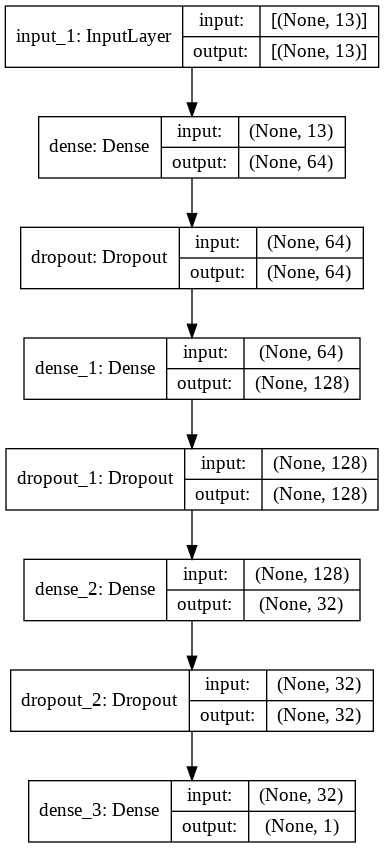

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [32]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [33]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[coeff_determination])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_sc, y_train, epochs=1000, batch_size=32, validation_data=(X_test_sc, y_test), callbacks=[callback])

Epoch 1/1000
186/186 [==============================] - 4s 4ms/step - loss: 673295.9823 - coeff_determination: -1.1179 - val_loss: 649041.7500 - val_coeff_determination: -1.0170
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 640856.9830 - coeff_determination: -1.0351 - val_loss: 544615.1875 - val_coeff_determination: -0.6678
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 486690.8788 - coeff_determination: -0.5077 - val_loss: 344495.9688 - val_coeff_determination: 0.0991
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 298764.2530 - coeff_determination: 0.2381 - val_loss: 262676.7812 - val_coeff_determination: 0.4616
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 255694.3672 - coeff_determination: 0.4742 - val_loss: 229689.2500 - val_coeff_determination: 0.5925
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 227659.4527 - coeff_determination: 0.57

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [35]:
model.evaluate(X_test_sc,y_test,batch_size=64)

31/31 [==============================] - 0s 1ms/step - loss: 115623.2344 - coeff_determination: 0.9207


[115623.234375, 0.9206703305244446]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [36]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.9300543932948462


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

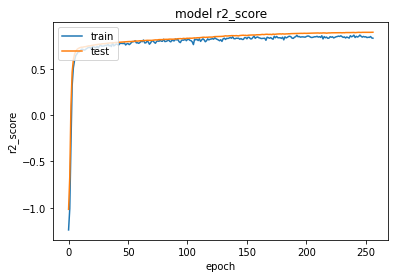

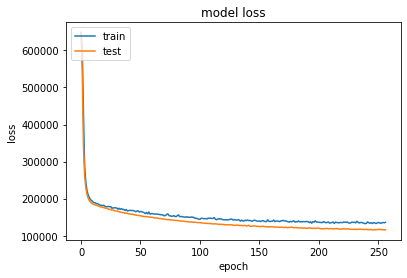

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [38]:
from keras.layers import BatchNormalization
model_1 = Sequential()
model_1.add(tf.keras.Input(shape=(13)))

model_1.add(BatchNormalization())
model_1.add(Dense(64,activation=keras.layers.LeakyReLU(alpha=0.05)))
model_1.add(Dropout(0.15))
model_1.add(Dense(128,activation=keras.layers.LeakyReLU(alpha=0.05)))
model_1.add(Dropout(0.15))
model_1.add(Dense(32,activation=keras.layers.LeakyReLU(alpha=0.05)))
model_1.add(Dropout(0.15))

model_1.add(Dense(1,activation='linear'))

In [39]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [40]:
model_1.compile(optimizer='adam', loss='mean_absolute_error', metrics=[coeff_determination])

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_1.fit(X_train_sc, y_train, epochs=1000, batch_size=16, validation_data=(X_test_sc, y_test), callbacks=[callback])
cp_callback = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/GL- AIML/NeuralNetworks',save_freq='epoch')

Epoch 1/1000
371/371 [==============================] - 2s 3ms/step - loss: 644524.5995 - coeff_determination: -1.9904 - val_loss: 487838.0312 - val_coeff_determination: -0.8005
Epoch 2/1000
371/371 [==============================] - 1s 3ms/step - loss: 441090.1410 - coeff_determination: -0.6801 - val_loss: 397521.3750 - val_coeff_determination: -0.2406
Epoch 3/1000
371/371 [==============================] - 1s 3ms/step - loss: 377958.4655 - coeff_determination: -0.1171 - val_loss: 309613.9375 - val_coeff_determination: 0.1910
Epoch 4/1000
371/371 [==============================] - 1s 3ms/step - loss: 296110.9344 - coeff_determination: 0.2502 - val_loss: 247992.9844 - val_coeff_determination: 0.4799
Epoch 5/1000
371/371 [==============================] - 1s 3ms/step - loss: 258226.0497 - coeff_determination: 0.3789 - val_loss: 224663.3906 - val_coeff_determination: 0.5738
Epoch 6/1000
371/371 [==============================] - 1s 3ms/step - loss: 246273.9905 - coeff_determination: 0.38

### Check the R2 score on complete test data

In [42]:
y_pred = model_1.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.8958997471036853


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

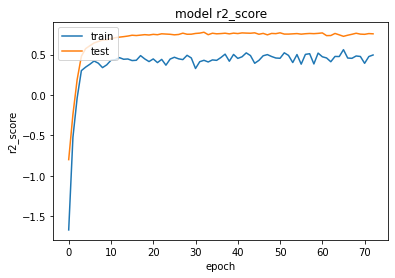

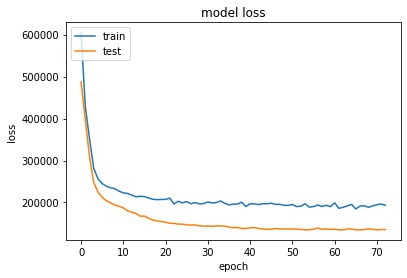

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [51]:
from keras.layers import BatchNormalization
#model_2.tf.keras.initializers.HeUniform(seed=7)
model_2 = Sequential()
model_2.add(tf.keras.Input(shape=(13)))

model_2.add(BatchNormalization())
model_2.add(Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=7)))
model_2.add(Dropout(0.15))
model_2.add(Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=7)))
model_2.add(Dropout(0.15))
model_2.add(Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=7)))
model_2.add(Dropout(0.15))
model_2.add(Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform(seed=7)))
model_2.add(Dropout(0.15))

model_2.add(Dense(1,activation='linear'))

In [53]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 13)                52        
_________________________________________________________________
dense_18 (Dense)             (None, 256)               3584      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)               

### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

In [57]:
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])


### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



In [58]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_2.fit(X_train_sc, y_train, epochs=1000, batch_size=64, validation_data=(X_test_sc, y_test), callbacks=[callback])

Epoch 1/1000
93/93 [==============================] - 1s 5ms/step - loss: 1156986264728.5107 - coeff_determination: -0.8822 - val_loss: 1120515784704.0000 - val_coeff_determination: -0.7476
Epoch 2/1000
93/93 [==============================] - 0s 3ms/step - loss: 1035220646541.6171 - coeff_determination: -0.7598 - val_loss: 438011494400.0000 - val_coeff_determination: 0.3999
Epoch 3/1000
93/93 [==============================] - 0s 3ms/step - loss: 322397141645.6170 - coeff_determination: 0.4481 - val_loss: 235148001280.0000 - val_coeff_determination: 0.6570
Epoch 4/1000
93/93 [==============================] - 0s 3ms/step - loss: 247115206917.4468 - coeff_determination: 0.5907 - val_loss: 196208328704.0000 - val_coeff_determination: 0.7119
Epoch 5/1000
93/93 [==============================] - 0s 3ms/step - loss: 252012142592.0000 - coeff_determination: 0.5588 - val_loss: 176283664384.0000 - val_coeff_determination: 0.7405
Epoch 6/1000
93/93 [==============================] - 0s 3ms/ste

### Check the R2 score on complete test data

In [59]:
from sklearn.metrics import r2_score
y_pred = model_2.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.9406627438844218


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

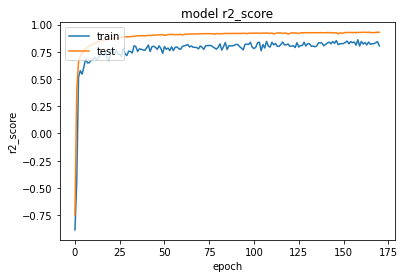

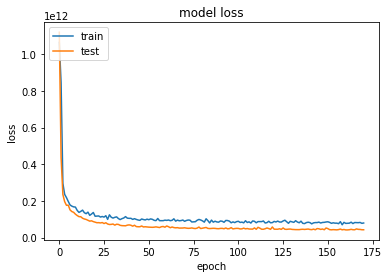

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()